In [89]:
import numpy as np

# real = [ 17.997149891756248, 20.31344626339141, 1222.417555744546, 105.40058474353825, 62.943987638666215, 123.2830015843275, 39.56739215967237, 118.38940311682155, 147.6583136381964]
# exp = [ 19.104130867191675, 19.211646217910637, 1219.9825412115222, 107.0963348213427, 62.378530356570394, 125.68234281323123, 38.44060546075022, 120.58454840905299, 148.66077898156357]
# random = [ 19.905329814866718, 18.986876542534983, 1203.9428257742907, 106.22296823723931, 62.05687943715982, 125.18226325713289, 39.41411119819797, 119.26452782253175, 147.35761885883247]

# real_sim = [1.6093567546669738,1.6791687641496487,36.239509425703154,3.6129458431593697,1.3074852080690358,2.896987605190723,2.092513002092194,2.0147405312189854,1.6064950785667076,]
# real_exp = [1.6583496679906395,1.682081134953312,35.9762639806403,3.6538842393922084,1.3183148836271597,2.909064773406113,2.0889021786950805,2.0462687576793215,1.5943646994937648,]
# exp = [ 1.6446651064333508,1.6395817509926578,36.038629562782305,3.6800505711984854,1.3196451688330058,2.982466480436055,2.079100194633063,2.0843570233795807,1.5933817391236613]
# random = [ 1.6650192068819052,1.6542572961175088,35.76194720774435,3.634966605033552,1.3018445573763893,2.9632272461401294,2.086849450325495,2.0396256535490935,1.6206237836668114]


def norm(metrics):
    max_val = [0.05778466694242426, 0.3223122700435975, 0.012066064386676869, 0.9268396909014895, 3.2623928451090363, 1.5465234397820748, 0.5078676675006912, 2.801961039330103, 3.69924937447873] 
    min_val = [-0.1757558896976201, 0.023489656331909938, 0.011662769245293386, 0.44876138482325445, 1.4463161581725672, 1.2217219707450424, 0.006839032527105921, 2.191203285563605, 3.4238532110091864]
    
    max_val = np.array(max_val)    
    min_val = np.array(min_val)
    metrics = np.array(metrics)
    return (metrics - min_val) / (max_val - min_val)


def dist(m1, m2):
    res = []
    for i in range(len(m1)):
        d = abs(m1[i] - m2[i])
        res.append(d)

    return np.array(res)

real_sim = [0.14770881157105947,-0.06030833176008616,0.010577646293493883,1.1036109199162618,2.104013918370062,1.7165871430493287,0.006338615512927439,2.6712334436801983,3.6319710870169453]
explore = [ 0.15784582012791154, -0.011238565502662215, 0.01043044054980284, 0.478287356125635, 2.031036419060271, 1.1971007749858777, 0.0030581039755351687, 1.813599017711624, 3.575368362524314]
random = [ -0.10831899293157636, -0.05797772834361859, 0.011814653663789332, 0.278445623606406, 1.5203647990831393, 0.8782539441124952, 0.1182096191270504, 1.4580658128191473, 3.7975535168195678]
real_exp = [ -0.10420288955029748, -0.09576193432960736, 0.011233208348820004, 0.43258702612618866, 1.4485147611943774, 1.6625416198287082, 0.03441757019738671, 2.4009911874753653, 3.6507089241034056]


real_exp = norm(real_exp)
real_sim = norm(real_sim)
explore = norm(explore)
random = norm(random)



In [90]:
import matplotlib.pyplot as plt
import numpy as np


def make_graph(title, data):

    metics_name = ["center\nof mass\nx", "center\nof mass\ny", "max\nshift", "mode\nindex", "longest\npath", "max\nradius", "local\ndensity", "nears\nneighbor", "beta\nindex"]

    x = np.arange(len(metics_name))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        multiplier += 1

    ax.set_ylabel('swarm metics difference')
    ax.set_title(title)
    ax.set_xticks(x + width, metics_name, fontsize=9)
    ax.legend(loc='upper left', ncols=3)
    ax.set_ylim(0, 4)

    return fig, ax


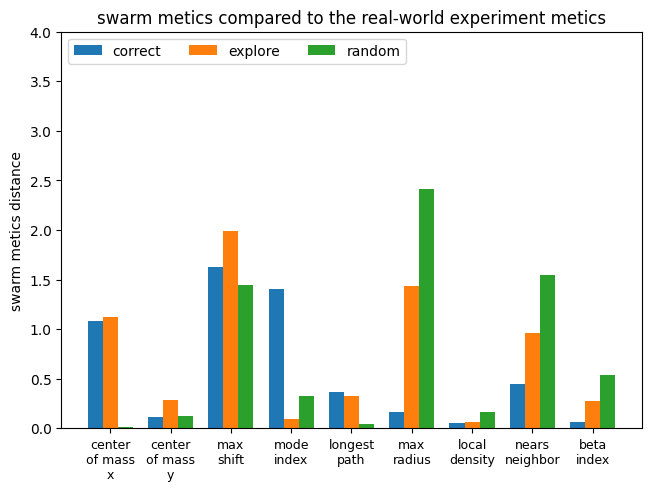

In [91]:
data = {}
data["correct"] = dist(real_sim, real_exp)
data["explore"] = dist(explore , real_exp)
data["random"]  = dist(random  , real_exp)

fig, ax = make_graph('swarm metics compared to the real-world experiment metics',data)
plt.show()

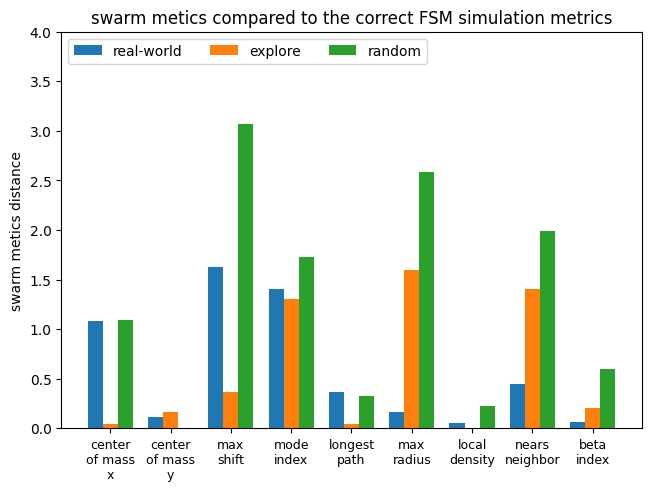

In [92]:
data = {}
data["real-world"] = dist(real_exp, real_sim)
data["explore"] = dist(explore , real_sim)
data["random"]  = dist(random  , real_sim)

fig, ax = make_graph('swarm metics compared to the correct FSM simulation metrics',data)
plt.show()